In [1]:
# auction to sell shares. follows an exponential curve such that all shares are allocated to N participants, and higher bids are incentivized by obtaining lower price per share. sealed bid.

total_shares = 100000  # Total number of shares to sell
N = 5                  # Number of participants guaranteed to receive shares
starting_price = 1     # Price per share for the first share

# Define the exponential curve function
def price_per_share(shares_allocated):
    return starting_price * 2**(shares_allocated / 10)  # Adjust the exponent as needed

# Collect sealed bids
bids = []
for i in range(N):
    participant_id = i + 1
    bid = input(f"Participant {participant_id}, enter your bid for all {total_shares} shares: ")
    bids.append({"id": participant_id, "bid": float(bid)})

# Sort bids in descending order
bids.sort(key=lambda bid: bid["bid"], reverse=True)

# Allocate shares and calculate final price
allocated_shares = 0
final_prices = {}
for bid in bids:
    if allocated_shares == total_shares:
        break
    desired_shares = total_shares - allocated_shares
    if desired_shares <= bid["bid"]:
        final_price = price_per_share(allocated_shares)
        final_prices[bid["id"]] = final_price
        allocated_shares += desired_shares
    else:

        final_price = price_per_share(allocated_shares + desired_shares)
        final_prices[bid["id"]] = final_price
        allocated_shares = total_shares

# Print results
print("Auction Results:")
for participant_id, price in final_prices.items():
    print(f"Participant {participant_id} received {allocated_shares // N} shares at ${price:.2f} per share.")

# Additional considerations:
# - Implement tie-breaking mechanism if multiple bids target the same number of shares.
# - Add minimum bid and reserve price checks if needed.
# - Adjust the curve function and starting price based on your specific requirements.
60

OverflowError: (34, 'Result too large')

In [ ]:
def price_per_share(shares_allocated, total_shares, starting_price, reserve_price, discount_factor):
    """
    Calculates the price per share based on the number of allocated shares, total shares, 
    starting price, reserve price, and discount factor.

    Args:
        shares_allocated: Number of shares already allocated.
        total_shares: Total number of shares to sell.
        starting_price: Price per share for the first share.
        reserve_price: Minimum acceptable price per share.
        discount_factor: Factor controlling the rate of price decrease.

    Returns:
        Price per share based on the exponential curve and reserve price.
    """

    shares_remaining = total_shares - shares_allocated
    price = starting_price * pow(discount_factor, -shares_allocated / shares_remaining)
    return max(price, reserve_price)


total_shares = 100
starting_price = 10
reserve_price = 5
discount_factor = 0.9

for i in range(total_shares):
    price = price_per_share(i, total_shares, starting_price, reserve_price, discount_factor)
    print(f"Share {i+1}: ${price:.2f}")


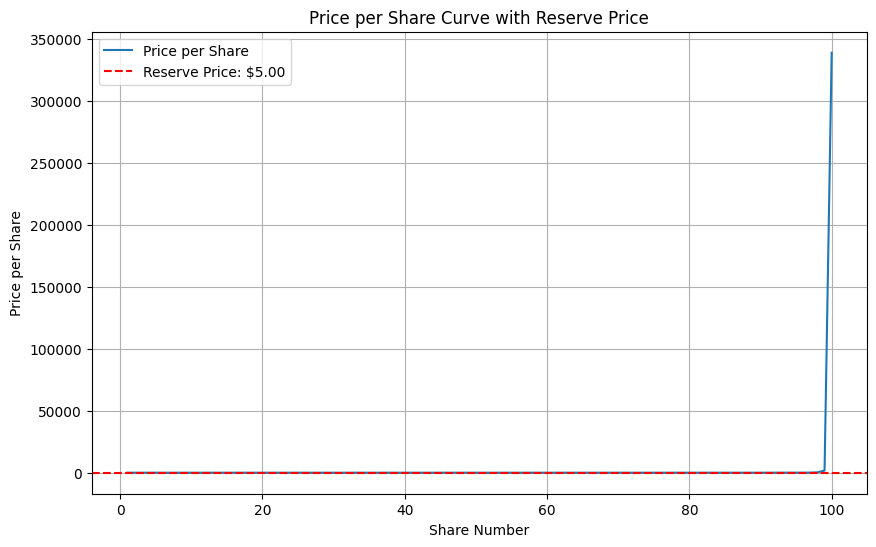

In [2]:
import matplotlib.pyplot as plt

def price_per_share(shares_allocated, total_shares, starting_price, reserve_price, discount_factor):
    """
    Calculates the price per share based on the number of allocated shares, total shares, 
    starting price, reserve price, and discount factor.
    """

    shares_remaining = total_shares - shares_allocated
    price = starting_price * pow(discount_factor, -shares_allocated / shares_remaining)
    return max(price, reserve_price)

# Define parameters
total_shares = 100
starting_price = 10
reserve_price = 5
discount_factor = 0.9

# Calculate prices for all shares
prices = []
for i in range(total_shares):
    price = price_per_share(i, total_shares, starting_price, reserve_price, discount_factor)
    prices.append(price)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, total_shares + 1), prices, label="Price per Share")
plt.axhline(y=reserve_price, color='red', linestyle='--', label=f"Reserve Price: ${reserve_price:.2f}")
plt.xlabel("Share Number")
plt.ylabel("Price per Share")
plt.title("Price per Share Curve with Reserve Price")
plt.legend()
plt.grid(True)
plt.show()
